# **U.S. Medical Insurance Costs**

## **Importing the file**

To get a better idea of what data the file contains, I will import it using pandas

In [4]:
import pandas as pd

In [5]:
# Import the csv using pandas and examine the columns
file = 'insurance.csv'
df = pd.read_csv(file)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Information about the features of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The data set has 1338 rows and 7 columns; age, sex, bmi, children, smoker, region, and charges. The data types of the features are float64(2), int64(2) and object(3). There are no missing values from the data, so there will be no need to clean the data set by removing or replacing any values or rows. However, the columns that contain string type variables appear to be labeled as objects rather than strings, these may need to be converted later if they present issues in further analysis.

## **Scoping the Project**

Before any significant analysis begins, it is important to define what the project will aim to acheive, how it will be done ,and why its being undertaken.

### **Problem Understanding**

Healthcare costs are a major financial burden for US families with about half of US adults experiencing difficulty with affording health care costs like premiums and out-of-pocket expenses. These issues primarily affect young adults, adults with lower than average income, and those that rely on access to healthcare more than others. Even beyond the upfront costs, medical debt can place prolonged financial pressure on those who have needed to borrow or enroll in payment plans. Medical debt also dissproportionately affects Black and Hispanic adults, women, parents, low-income adults, and those that are uninsured.

Source: https://www.kff.org/health-costs/issue-brief/americans-challenges-with-health-care-costs/

### **Goals**

The goals of the project will be to understand how healthcare costs vary depending on demographic information and to identify, if there are any, groups that are disproportionatly affected. I will focus primarily on cost differences between males and females and exploring how living in different regions affects the cost. 

### **Data**

The insurance cost data used in the project is provided by Codecademy. The data set has 1338 rows and 7 columns; age, sex, bmi, children, smoker, region, and charges. The data types of the features are float64(2), int64(2) and object(3). No external data will be used or needed for this project.

### **Analysis**

The analysis will primarily look at the relationship of each feature to the associated cost of insurance in order to determine if any trends exist. This will include computing summary statistics and plotting distributions. After the descriptive analysis, a predictive analysis will include regression models to determine if insurance cost can be predicted from any or all of the features.

Analysis will be validated by comparing the results to already known trends about the relationship of certain demographic information to the cost of insurance for individuals within those demographics.

Ideas:
1. Find out the average age of the patients in the dataset.
2. 
Analyze where a majority of the individuals are from
3. 
Look at the different costs between smokers vs. non-smoker .
Figure out what the average age is for someone who has at least one child in this dataset.

### **Ethical Considerations**

The data does not include income as a feature, so it this analysis will be unable to determine if healthcare is actually unaffordable for the individuals that comprise the samples in the data set. This analysis also leaves out racial identity and gender non-conforming identifiers, which leaves out important parts of the population that might be important in the consideration of healthcare costs.

Some of these features, such as age, bmi and smoker are features that do have a demonstrated impact on the health of an individual. For calculating insurance cost, it is likely that there are those that are classified as high risk because of these features and thus have a higher insurance charge because of it. This corrolates high insurance cost with being unhealthy or high risk which is not a causal relationship, nor should a high insurance cost be used to determine if someone is unhealthy or high risk.

## **Descriptive Analysis**

First we will calculate summary statistics for the numerical data and counts for the categorical data.

In [22]:
# Summary statistics for the numerical data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


From the summary statistics we can see that age, bmi and children all have a mean that is close to the median, meaning that these distribution are symmetric. Age has the highest average spread from the mean with a standard deviation of 14 years. Also of note, there are no individuals over the age of 64 which means that the data excludes geriatric samples. This makes sense since in the US, those over the age of 64 are eligible for medicare. 

The maximum amount of children for a sample is given as 5, thus excluding families that are larger. Also it is unclear about whether parents were counted twice in this data set, possibly leading to skewed data. Now we will look at the categorical data.

In [24]:
# Frequency counts of categorical data
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [25]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

From the value counts, we can see that there are almost equal amounts of both female and males in the data set, this suggests that men and women are equally represented in the study. However, it might be possible that one sex is more represented for other categorizations.

In [27]:
pd.crosstab(df['sex'], df['region'])

region,northeast,northwest,southeast,southwest
sex,,,,
female,161,164,175,162
male,163,161,189,163


From the crosstabs, we can see that both sexes are represented nearly equally in the smoker and non smokers. Sexes are represented equally in regions as well. This even distribution of sexes.

We can also graph the distributions to get a visual of the ways in which sex is represented in each numerical category.

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

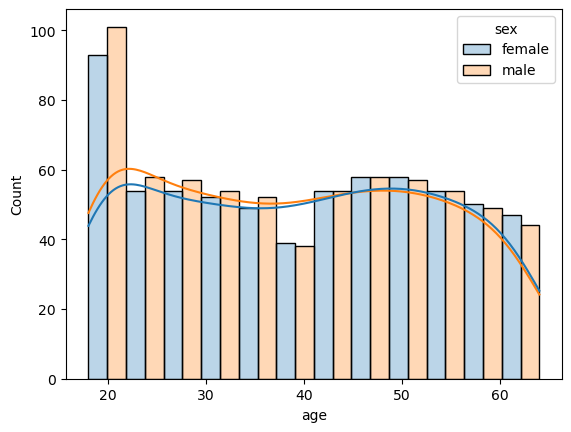

In [31]:
sns.histplot(data=df, x='age', hue='sex', multiple='dodge', alpha=0.3, kde=True, stat='count')
plt.show()

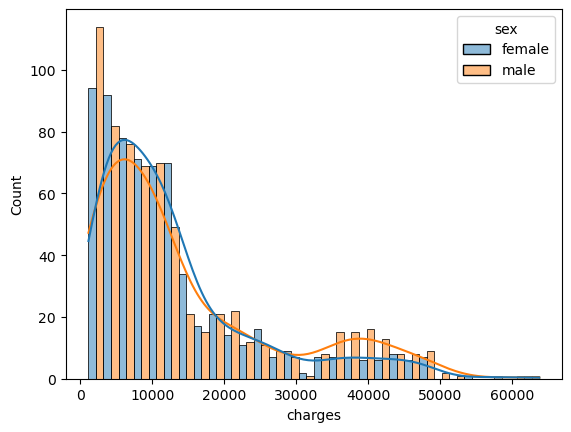

In [32]:
sns.histplot(data=df, x='charges', hue='sex', multiple='dodge', alpha=0.5, kde=True)
plt.show()

From the histogram of age, we can see that the distribution is mostly symetric with a larger count of younger people in the sample. Male and female counts are about the same for most ages. This suggests that the data represents both sexes equally throughout all ages, but younger people under the age of 30 are more represented. 

The histogram of charges shoes that most people are paying below 10,000 dollars in annual health insurance costs. The distribution of health care costs is positively skewed because there are some larger annual charges. Females tend to pay more than males for insurance below 20,000 dollars, however males tend to pay more than females for charges over 30,000 dollars.

Next we can examine the average cost of insurance based on the different categories presented in the data set. This will be the first attempt to start to understand cost differencees in insurance cost for different groups.

In [35]:
df.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [36]:
df.groupby('sex')['charges'].median()

sex
female    9412.96250
male      9369.61575
Name: charges, dtype: float64

From the averages computed from each group above, we can see that on average, men pay more for insurance than women do. However, this observation is not a representative value for a majority of the people in the data set since the distribution of costs are positively skewed with many larger insurance costs in the data set. Looking at the medians for each sex, we can see a more representative value for the typical cost where most women pay more for insurance than most men. 

Having determined that the distributions for insurance cost are positively skewed due to  having some larger outliers, I will use the median as the metric for the typical value since it is unaffected by outliers. Looking at the mean cost of insurance for each sex within each region below and comparing it to the median:

In [39]:
df.groupby('region')['charges'].median()

region
northeast    10057.652025
northwest     8965.795750
southeast     9294.131950
southwest     8798.593000
Name: charges, dtype: float64

From looking at the medians, we can see that the typical value for insurance charges are different between the four regions. This is significant, because this suggests that there is a relationship between insurnace cost and insurance charge, where those that live in the NE tend to pay the most insurance, and those in the SW tend to pay the least. Interestingly, these are opposite corners of the US. 

Next, I will go one level deeper to see if there are differences between sex for insurnance charges within each region. 

In [41]:
df.groupby(['region', 'sex'])['charges'].mean()

region     sex   
northeast  female    12953.203151
           male      13854.005374
northwest  female    12479.870397
           male      12354.119575
southeast  female    13499.669243
           male      15879.617173
southwest  female    11274.411264
           male      13412.883576
Name: charges, dtype: float64

In [42]:
df.groupby(['region', 'sex'])['charges'].median()

region     sex   
northeast  female    10197.77220
           male       9957.72160
northwest  female     9614.07290
           male       8413.46305
southeast  female     8582.30230
           male       9504.31030
southwest  female     8530.83700
           male       9391.34600
Name: charges, dtype: float64

Looking at the mean compared to the median for each region, we can see that the trends for the mean do not agree with the trends for the median. Looking only at the median values for each region:
- northeast: females will typically pay more for insurance than males.
- northwest: females will typically pay more for insurance than males.
- southeast: males will typically pay more for insurance than females.
- southwest: males will typically pay more for insurance than females.

Based on the above trends for the median insurance cost for males and females in different regions of the US, we can see that females typically pay more for insurance in the north, and males typically pay more for insurance in the south.

To conlcude the exploratory data analysis, I will plot the distributions of cost for each gender for each region so that the spread and shape of the data is easy to see.

<Axes: xlabel='charges', ylabel='region'>

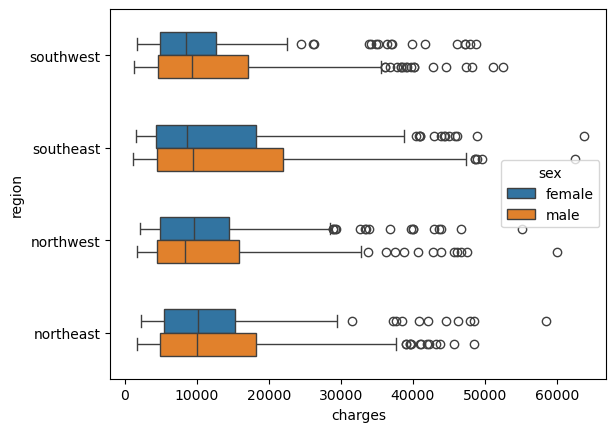

In [45]:
sns.boxplot(data=df, y='region', x='charges', hue='sex', width=0.5)

The box plots above contain the interformation that was uncovered in the median and mean values for each region. However we can now clearly see the distribution for each sex within each region much clearer than before. In general except for the NE region, we can see that males tend to have higher values for outliers, thus meaning that the spread of the male charges is larger and more positively skewed. However, this pattern does not hold for the NE region as stated above, where the max of the female distribution is higher than the male distribution. In general, there is more spread for the male data than the female data. This is typically due to larger outliers in the male data. However, we can see that in all regions, males and females all have positive skewed data meaning each sex has larger outliers. 

From this exploration, we can conclude that 1) there are insurance charge differences between the different regions in the US, and 2) within those regions there are differences in the insurance charge for each sex.

# Predictive Modeling

For the predictive modeling, I will attempt to predict the insurance cost of an individual using the features associated with each individual, i.e. age, sex, bmi, children, smoker and region. This will be done first with a multiple linear regression. 

## Linear Regression: Predicting charges from region

In this section, I will attempt to train a linear regression model using region as the feature and charges as the target. 

In [51]:
# Loading in the model libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
# Create the feature and target vectors
X, y = df['bmi'], df['charges']
X = X.to_frame()

# Split the data in to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20)

# Fit the linear regression model to the training data
regressor = LinearRegression().fit(X_train, y_train)

# Evaluate the model's performance on the test set using mean-squared error
y_pred = regressor.predict(X_test)
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 130650803.84
R^2 Score: -0.09


The mean squared error is quite high, which suggests that the model is not making accurate predictions. This is confirmed by looking at the $R^2$ value which is close to zero, suggesting that there is no linear correlation between the predictions and the test values that we created.

To visualize this model, we will plot the 

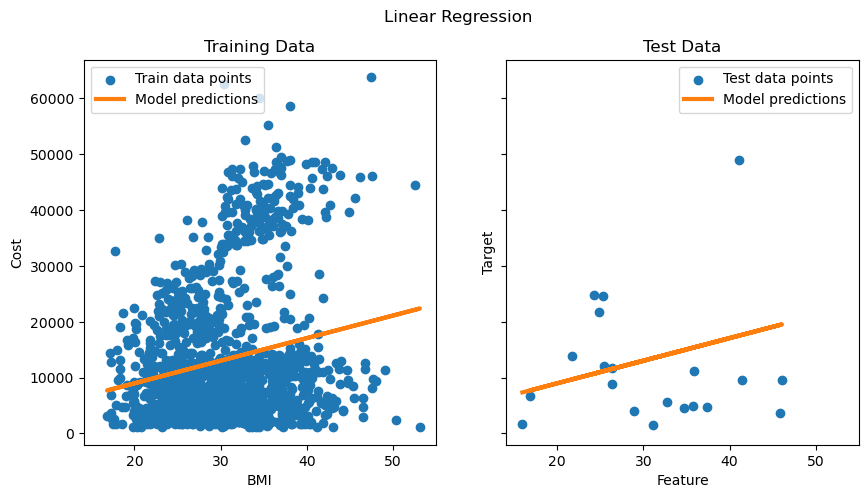

In [84]:
# Import Matplotlib
import matplotlib.pyplot as plt

# Create the subplot grid
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

# Create graph of Cost vs BMI using the training sets for both.
ax[0].scatter(X_train, y_train, label="Train data points")

# Creates the regression line
ax[0].plot(X_train, regressor.predict(X_train), linewidth=3, color="tab:orange", label="Model predictions")
ax[0].set(xlabel="BMI", ylabel="Cost", title="Training Data")
ax[0].legend()

# Creates a graph of the Cost vs BMI using the test set
ax[1].scatter(X_test, y_test, label="Test data points")

# Plots the regression line using y_pred
ax[1].plot(X_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test Data")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show()

From the above visualizations, we can confirm that the model is indeed inaccurate as the regression line does not capture the pattern of the Cost vs BMI. A linear regression model using just one feature appears to be insufficient for training an accurate predictive model. Because of this, we will try to train a multiple linear regression model using several features, both quantitative and qualitative, to try to train a predictive model.

## Multiple Linear Regression